In [1]:
%run '0.0_init_configuration.ipynb'

In [2]:
#Download data
df = pd.read_csv('../../../data/processed/0.2_Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


### Exploratory data analysis (EDA)

**Is there any relation between target variable and inputs variables?**

1. Existe una correlación fuerte entre la variable `target` y `chestpain(0.55)`, `restingBP(0.48)`, `slope(0.8)`, `noofmajorvessels(0.5)`

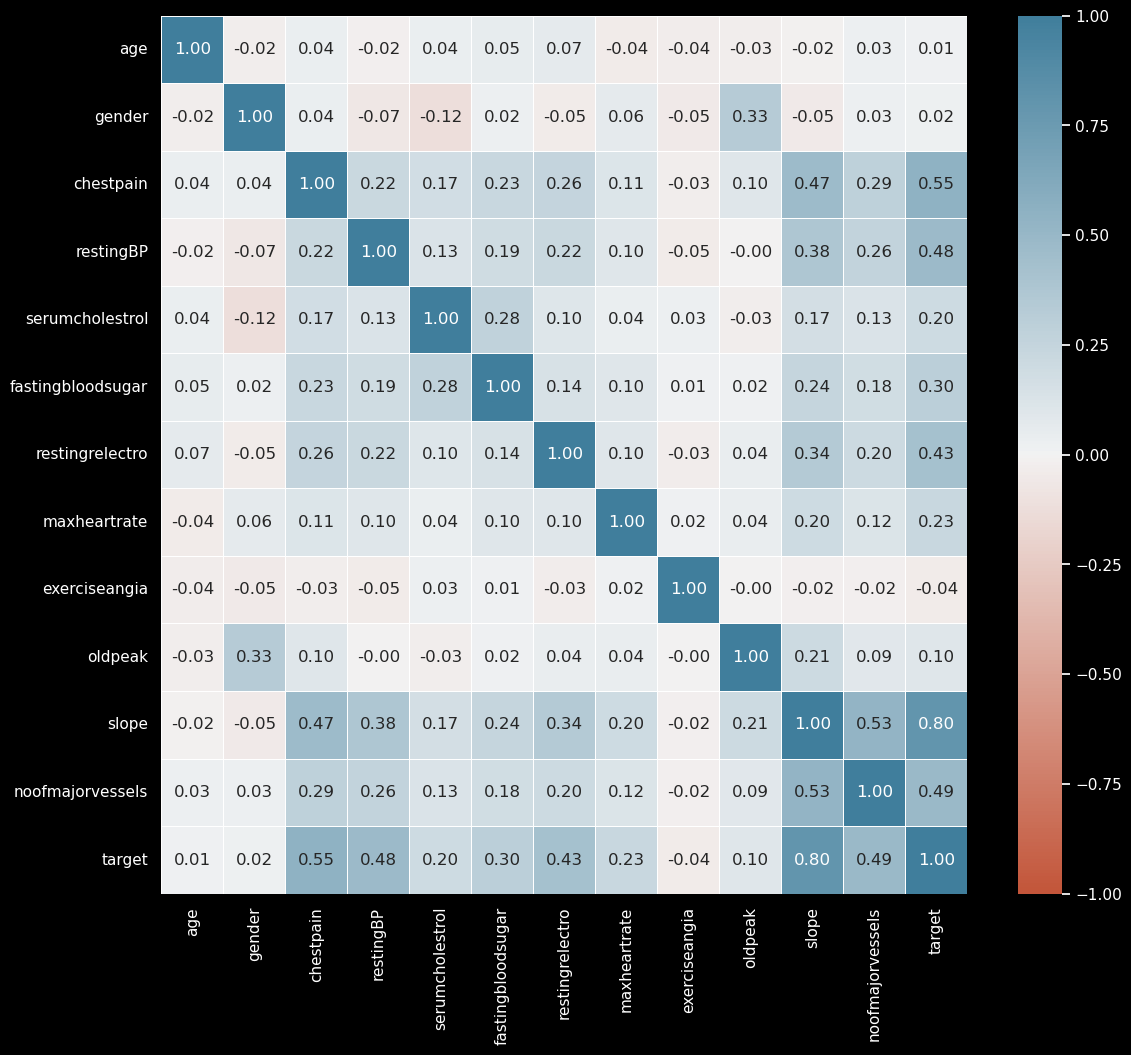

In [3]:
#Eliminamos la columna patientid, ya que no nos sirve de nada
corre_matrix = df.drop(columns=['patientid']).corr()

#Mapa de calor
sns.heatmap(data=corre_matrix,
            cmap=sns.diverging_palette(20,230, as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            cbar={'shrink' : 0.5},
            annot=True,
            fmt='.2f'
            )
plt.show()

**1. Age and gender Analysis**

In [4]:
#Rango de edad
age_range = f'Age range: {df["age"].min()} - {df["age"].max()}'
age_range

'Age range: 20 - 80'

In [5]:
# Detalles del Paciente mayor
oldest_patient = df.loc[df['age'].idxmax()]
oldest_patient

patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64

In [6]:
# Detalles del Paciente menor
youngest_patient = df.loc[df['age'].idxmin()]
youngest_patient

patientid            463851.0
age                      20.0
gender                    1.0
chestpain                 0.0
restingBP               199.0
serumcholestrol         248.0
fastingbloodsugar         0.0
restingrelectro           0.0
maxheartrate             86.0
exerciseangia             1.0
oldpeak                   3.2
slope                     0.0
noofmajorvessels          0.0
target                    0.0
Name: 31, dtype: float64

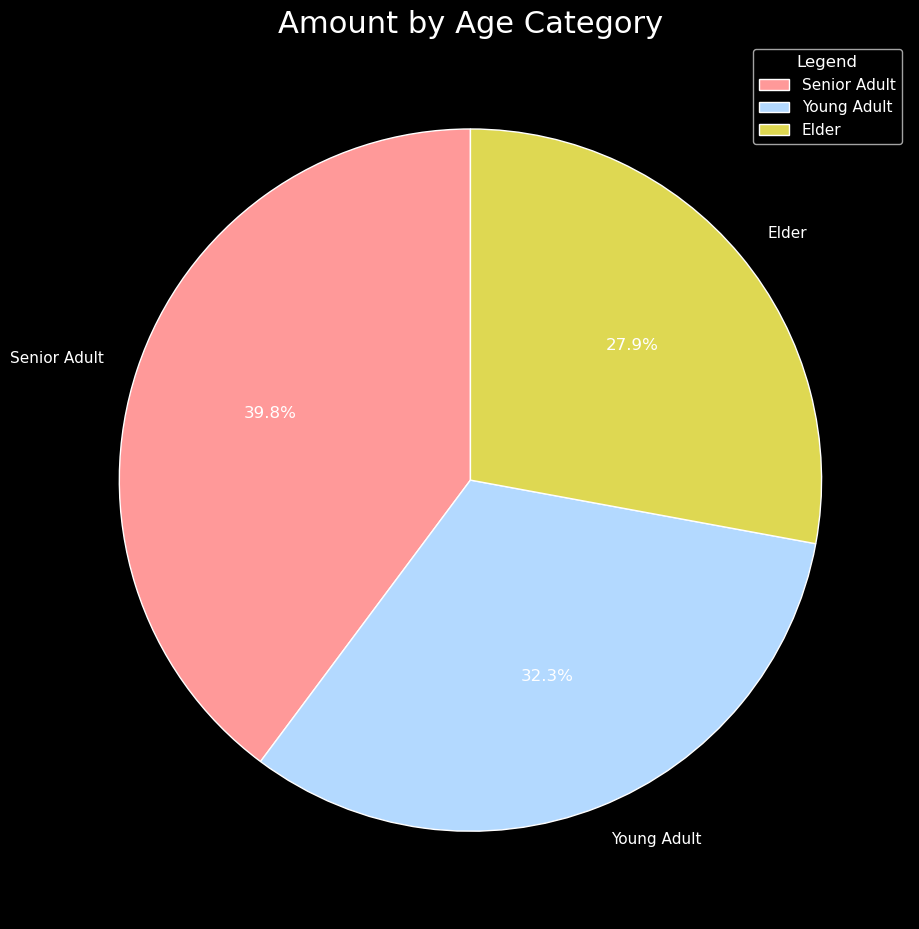

In [7]:
#Grafico

age_category = df['age'].apply(lambda x: 'Young Adult' if 18 <= x <= 35
                             else 'Senior Adult' if 35 < x <= 55
                            else 'Elder')

# contamos los valores de cada categoria de edad
amount = age_category.value_counts().tolist()

# definimos las variables categoricas unicas
labels = age_category.unique().tolist()

colors= ["#ff9999", "#b3d9ff", "#DED852"]

#grafico de pastel
plt.pie(amount, labels=labels, 
        autopct='%1.1f%%', startangle=90, colors=colors)

plt.legend(loc='upper right', title='Legend')
plt.title('Amount by Age Category', fontsize=22)
plt.show()

**Resting blood pressure analysis**

In [12]:
#What is the average resting blood pressure among the patients?

average_resting_bp = df['restingBP'].mean()
print(f'Average resting blood pressure: {average_resting_bp:.2f}mm Hg')

Average resting blood pressure: 151.75mm Hg


**Are There Classifications for Resting Blood Pressure?**

Yes, according to The british Heart fundation, resting blood pressure can be classified into several categories based on the measurement in millimeters of mercury (mm Hg):

- Normal blood pressure: 90-120 mm Hg
- High-normal blood pressure: 120-140 mm Hg
- Stage-one: 140-160 mm Hg
- Stage-two: 160-180 mm Hg
- Stage-three: 180-200 mm hg

In [22]:
bp_category = df['restingBP'].apply(lambda x : 'normal' if 90 <= x < 120
                      else 'high_normal' if 120 <= x <140
                      else 'stg_one' if 140 <= x < 160
                      else 'stg_two' if 160 <= x < 180
                      else 'stg_three')

These results are intriging, they indicate that patients with stage_one > 140 mm hg mostly have heart conditions.

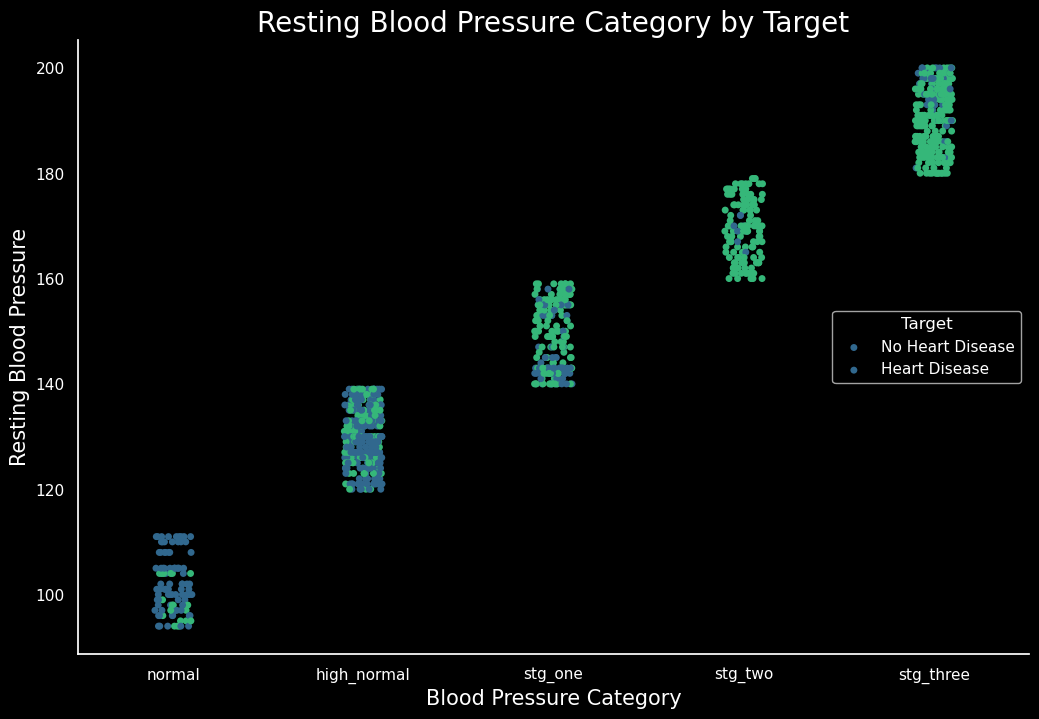

In [29]:
category_order = ['normal', 'high_normal', 'stg_one', 'stg_two', 'stg_three']

sns.catplot(data=df,
            x=bp_category,
            y='restingBP',
            order=category_order,
            palette='viridis',
            hue='target',
            height=7,
            aspect=1.5,
            legend=False)

plt.title('Resting Blood Pressure Category by Target', fontsize=20)
plt.xlabel('Blood Pressure Category', fontsize=15)
plt.ylabel('Resting Blood Pressure', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'], loc='right')

plt.show()

**Serum Cholesterol analysis**

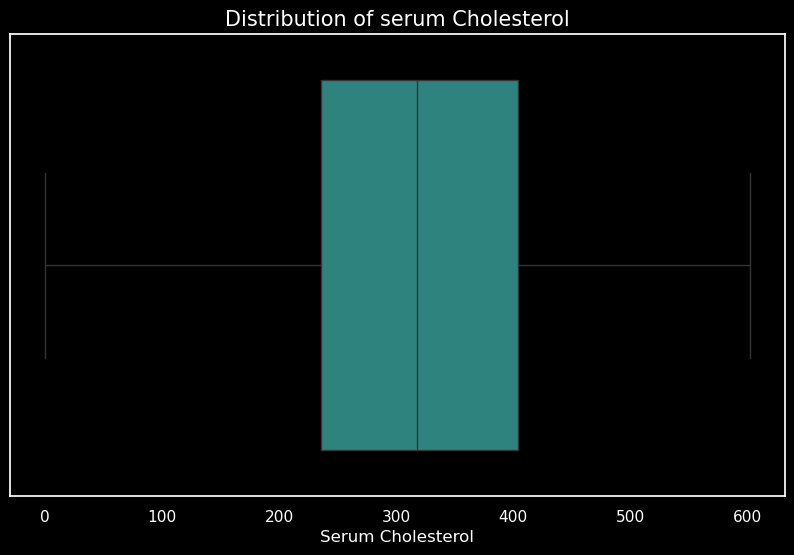

In [37]:
# How does serum cholesterol vary across different patients?
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='viridis')
plt.title('Distribution of serum Cholesterol', fontsize=15)
plt.xlabel('Serum Cholesterol')
plt.show()

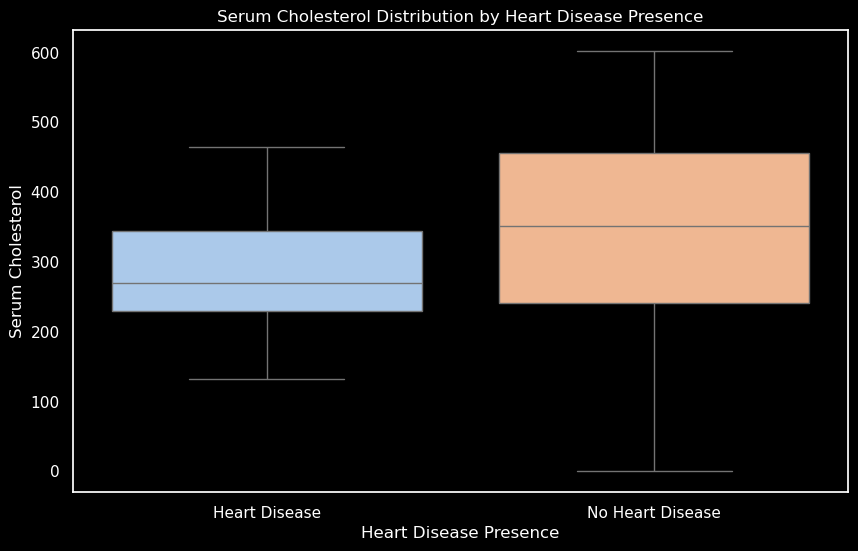

In [38]:
#How does serum cholesterol differ between patients with and without heart disease?
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['Heart Disease', 'No Heart Disease']) #blue yes, orange no
plt.show()


**Fasting Blood Sugar Analysis**


In [ ]:
#What percentage of patients have fasting blood sugar greater than 120 mg/dl?
percentage_high_fasting_sugar = df['fastingbloodsugar'].sum() / len(df) * 100

#df['fastingbloodsugar'].mean()*100

print(f'Percentage of patients with high fasting blood sugar: {percentage_high_fasting_sugar:.2f}%')

Percentage of patients with high fasting blood sugar: 29.60%


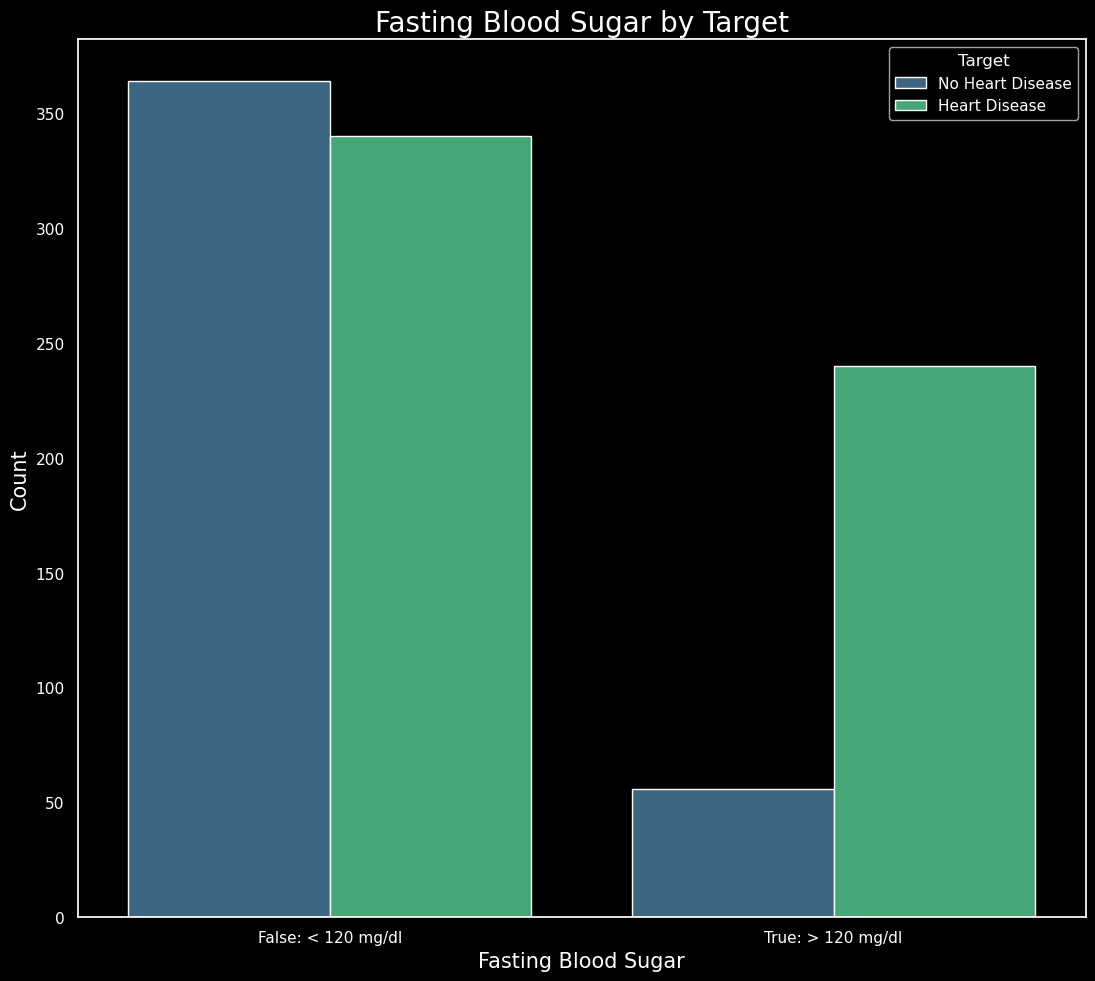

In [46]:
sns.countplot(x='fastingbloodsugar', data=df, hue='target', palette='viridis')
plt.title('Fasting Blood Sugar by Target', fontsize=20)
plt.xlabel('Fasting Blood Sugar', fontsize=15)
plt.xticks(ticks=[0, 1], labels=['False: < 120 mg/dl', 'True: > 120 mg/dl'])
plt.ylabel('Count', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

**Chest Pain analysis**


In [50]:
#What is the most common type of chest pain observed in the patients?

chest_pain_counts = df['chestpain'].value_counts()
chest_pain_counts

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64

Answer: Chest pain type 2 (Atyplical Angina)

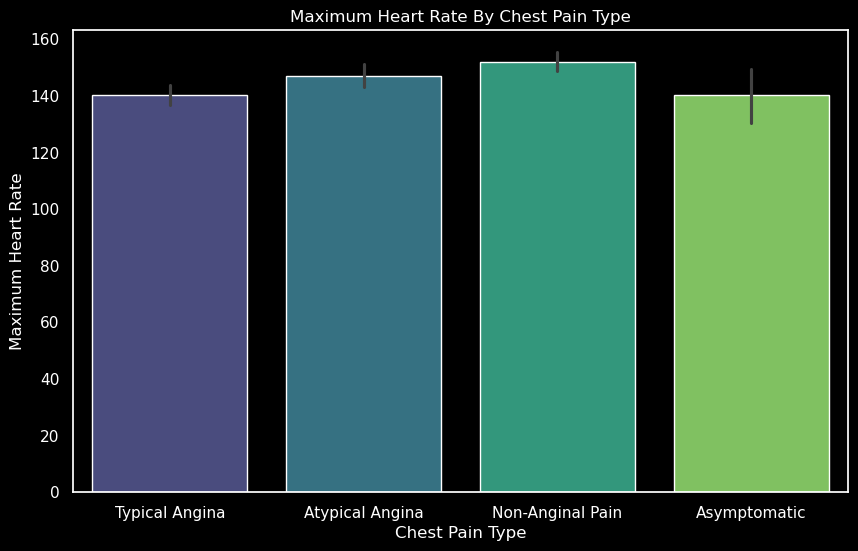

In [51]:
#visualization: 
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate By Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.ylabel('Maximum Heart Rate')
plt.show()

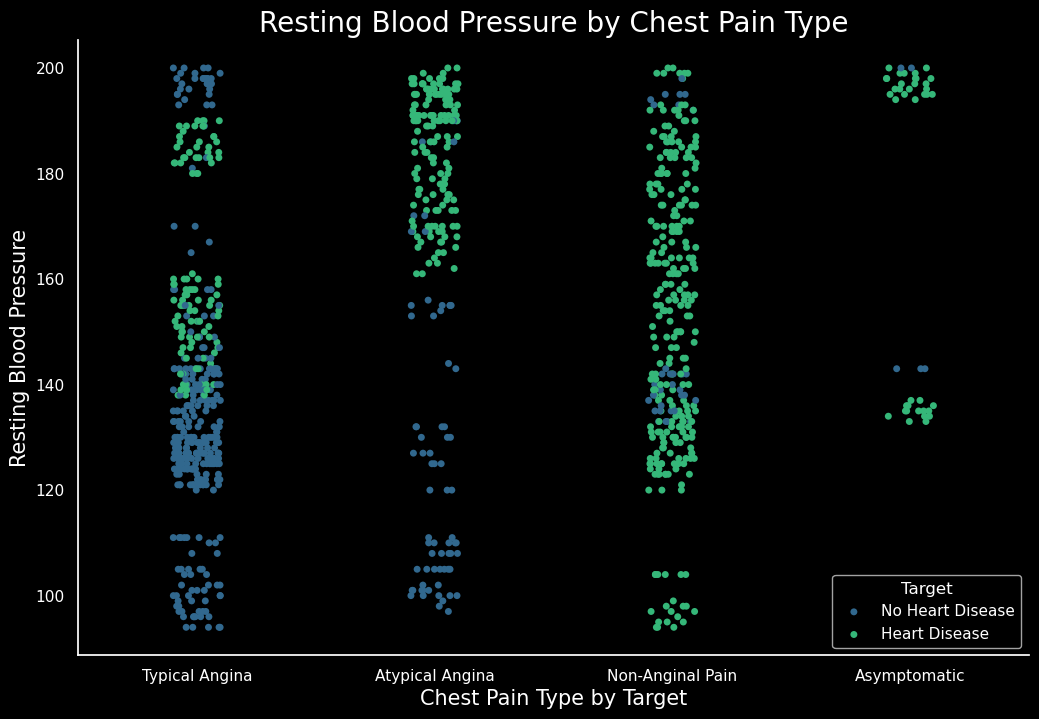

In [52]:
sns.catplot(
    data=df,
    x='chestpain',
    y='restingBP',
    palette='viridis',
    hue='target',
    height=7,
    aspect=1.5,
    legend=False
)

plt.title('Resting Blood Pressure by Chest Pain Type', fontsize=20)
plt.xlabel('Chest Pain Type by Target', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.ylabel('Resting Blood Pressure', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'], loc='lower right')
plt.show()

**Electrocardiogram analysis**

* Answer: There are 3 types of resting electrocardiogram results and they are in this order (Normal(0) = 454, Abnormality(1) = 344 and hypertrophy(2) = 202 )


In [55]:
resting_electro_counts = df['restingrelectro'].value_counts()
resting_electro_counts

restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64

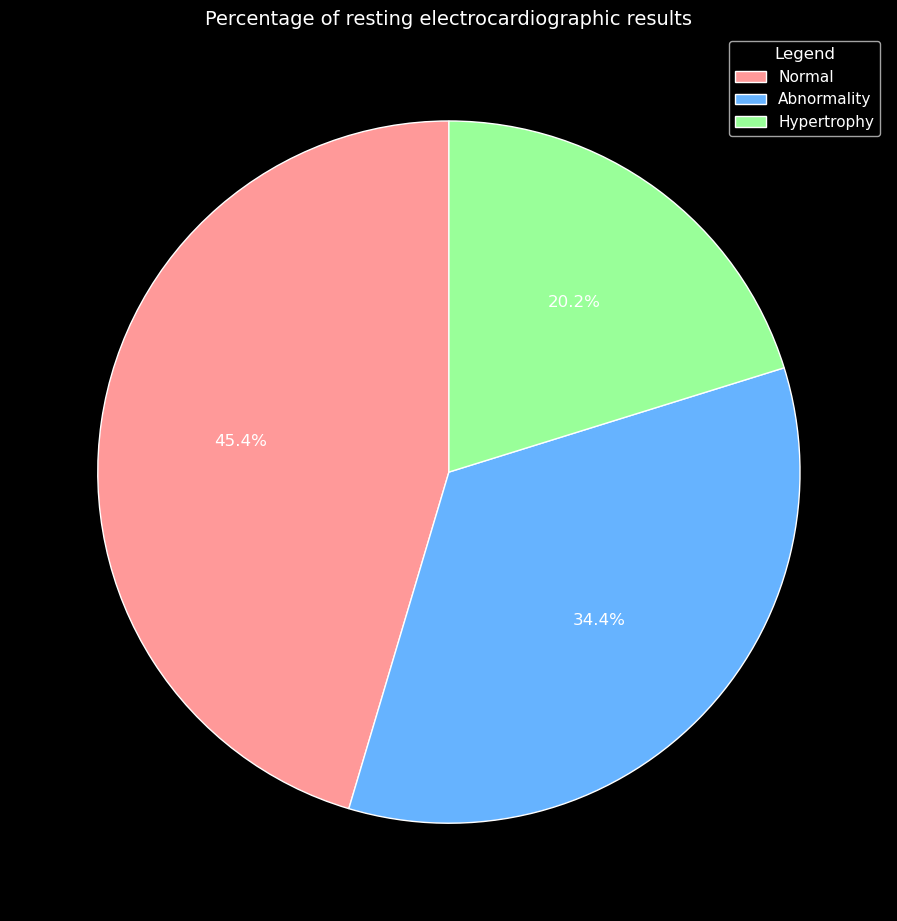

In [59]:
#convertimos en porcentaje en decimales usando normalize
resting_electro_porcentage = df['restingrelectro'].value_counts(normalize=True) * 100

plt.pie(resting_electro_porcentage, autopct='%1.1f%%', colors=['#ff9999','#66b3ff', '#99ff99'], startangle=90)
plt.title('Percentage of resting electrocardiographic results', fontsize=14)
plt.legend(
    title='Legend',
    loc='upper right',
    labels=['Normal', 'Abnormality', 'Hypertrophy']
)
plt.show()

In [62]:
#What is the averege maximun heart rate achieved by the patients on average?
average_max_heart_rate = df['maxheartrate'].mean()
print(f'Average maximum heart rate: {average_max_heart_rate:.2f}bpm')

Average maximum heart rate: 145.48bpm


In [67]:
#How many patients experienced exercise-induced angina?

exercise_angina_count = df['exerciseangia'].sum()
print(f'Number of patients with exercise-induced angina: {exercise_angina_count}')

Number of patients with exercise-induced angina: 498


In [70]:
#What is the average oldpeak(ST depression induced by exercise relative to rest) among the patients?
average_oldpeak = df['oldpeak'].mean()
print(f'Average Oldpeak {average_oldpeak:.2f}')

Average Oldpeak 2.71


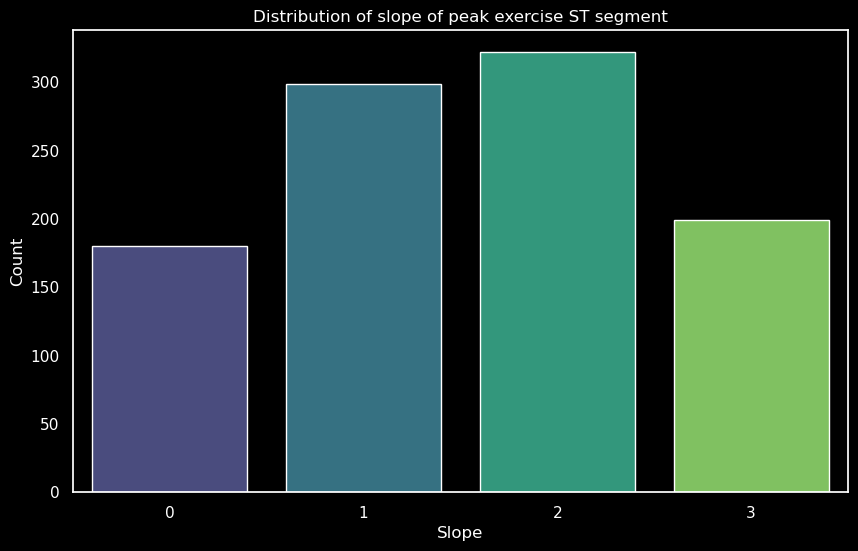

In [71]:
#How is the slope of the peak exercise ST segment distributed in the dataset?
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of slope of peak exercise ST segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()


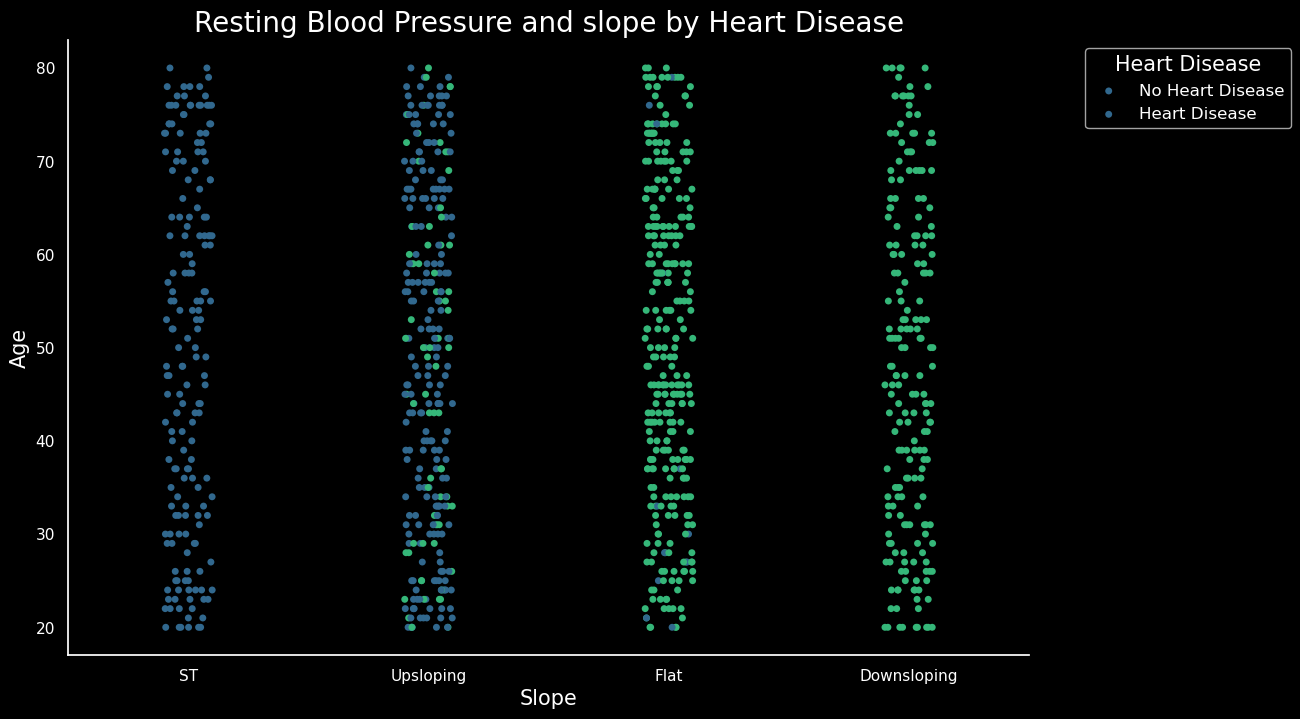

In [72]:
sns.catplot(data=df,
            x='slope',
            y='age',
            palette='viridis',
            hue='target',
            height=7,
            aspect=1.5,
            legend=False )
plt.title('Resting Blood Pressure and slope by Heart Disease', fontsize=20)
plt.xlabel('Slope', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=['ST','Upsloping', 'Flat', 'Downsloping'])
plt.ylabel('Age', fontsize=15)
plt.legend(title='Heart Disease', 
            labels=['No Heart Disease', 'Heart Disease'], 
            fontsize=12, 
            title_fontsize=15, 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left'
)
plt.show()

In [79]:
#What is the range of the number of major vessels in the patients?
vassels_rage = f"Number of Major vessels range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}" 
vassels_rage

'Number of Major vessels range: 0 - 3'

In [88]:
#How many patients have all three major vessels showing defects?
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f'Number of patients with defects in All Three Major Vessels: {defects_count}')

Number of patients with defects in All Three Major Vessels: 116


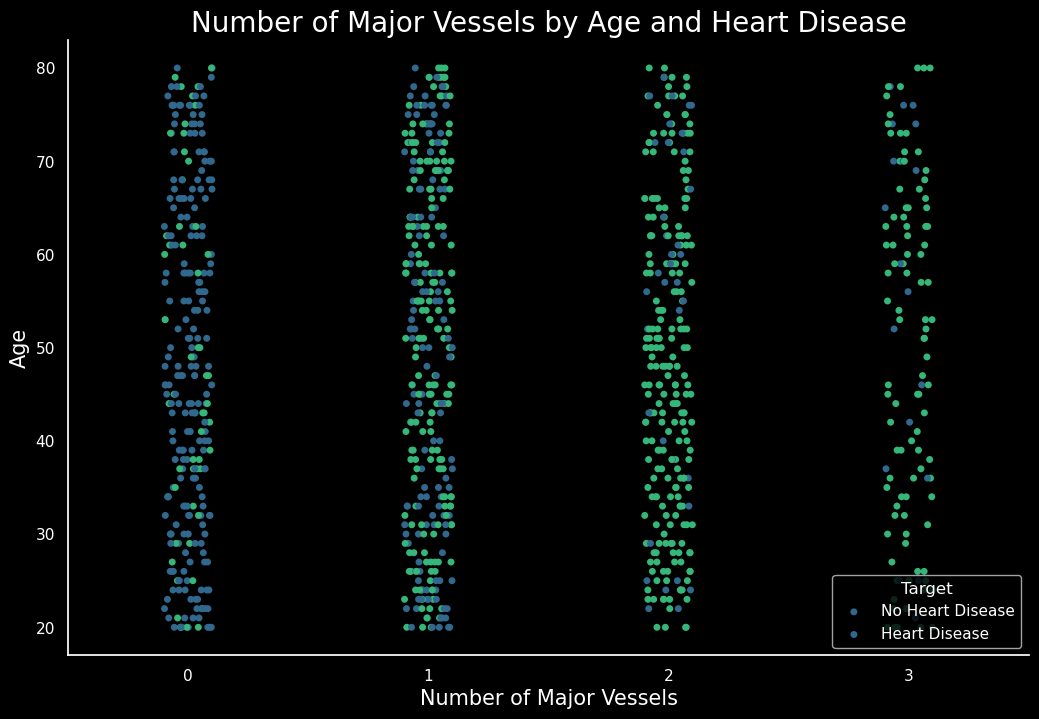

In [89]:
sns.catplot(data=df,
            x='noofmajorvessels',
            y='age',
            palette='viridis',
            hue='target',
            height=7,
            aspect=1.5,
            legend=False
)

plt.title('Number of Major Vessels by Age and Heart Disease', fontsize=20)
plt.xlabel('Number of Major Vessels', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'], loc='lower right')

plt.show()

In [96]:
#What percentage of patients in the dataset have heart disese (target = 1)?

percentage_heart_disese = (df['target'].sum() / len(df) )* 100
print(f'Percentage of Patients with Heart disese: {percentage_heart_disese:.2f}%')

Percentage of Patients with Heart disese: 58.00%


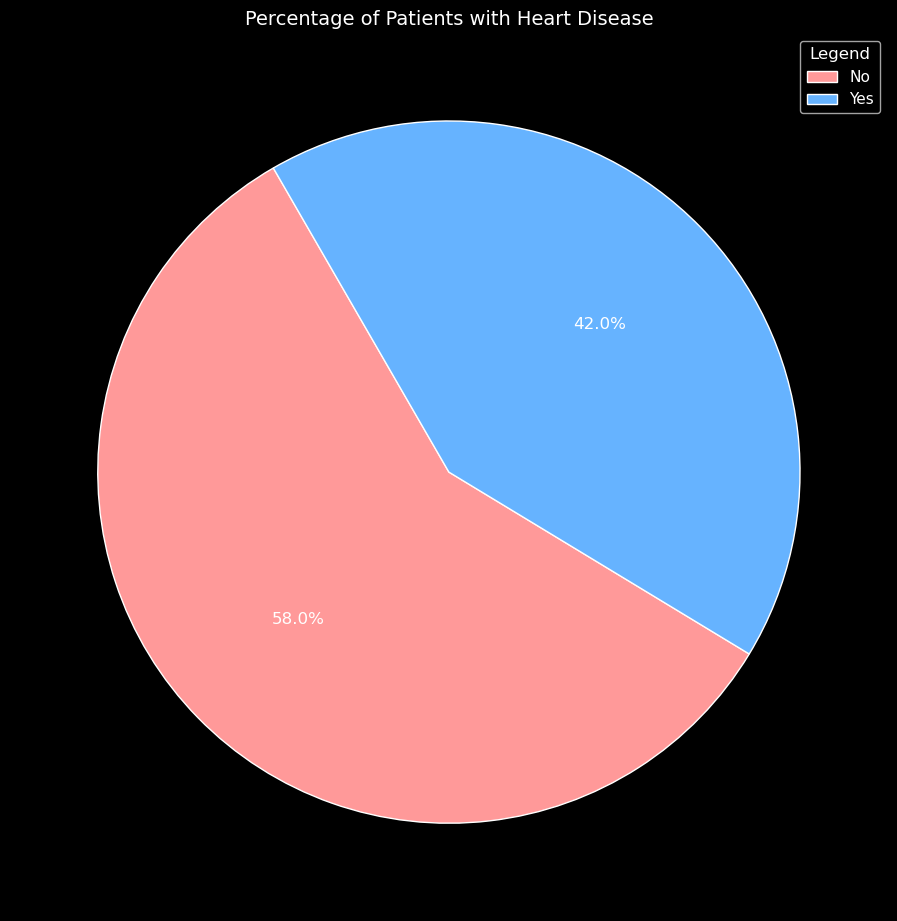

In [97]:
heart_disease_prctge = df['target'].value_counts(normalize=True) * 100

plt.pie(
    heart_disease_prctge, 
    autopct='%1.1f%%', 
    colors=['#ff9999','#66b3ff'], 
    startangle=120
)
plt.title('Percentage of Patients with Heart Disease', fontsize=14)
plt.legend(
    title='Legend',
    loc='upper right',
    labels=['No', 'Yes']
)
plt.show()